## Лабораторная работа №1 | Вариант 6

Выполнил: 

### 1. Numpy

In [2]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [3]:
H = [[1.0 if i == j else 0.0 for j in range(3)] for i in range(3)]

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [4]:
A = [[0 for _ in range(5)] for _ in range(5)]
for i in range(1, 5):
    for j in range(i):
        A[i][j] = i

3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [5]:
9
10

10

4. Как найти самое часто встречаемое значение между двумя массивами? 

In [6]:
import numpy as np

arr1 = np.array([7, 2, 4, 4, 2, 2])
arr2 = np.array([8, 4, 57, 13, 3, 4])

combined = np.concatenate([arr1, arr2])
unique, counts = np.unique(combined, return_counts=True)

max_count = counts.max()
print(f"Самые частые значения: {unique[counts == max_count]}")

Самые частые значения: [4]


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [7]:
import warnings

np.seterr(all='ignore')
warnings.filterwarnings('ignore')

arr = np.array([1, 2, 0])
result = arr / 0

print("Код выполнен")

Код выполнен


6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [8]:
def generator():
    for _ in range(10):
        yield random.randint(1, 37)


arr = np.array(list(generator()))
print("Массив случайных чисел:")
print(arr)

NameError: name 'random' is not defined

7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [ ]:
import random

def generator():
    for _ in range(10):
        yield random.randint(1, 37)


arr = np.array(list(generator()))
print("Массив случайных чисел:")
print(arr)
arr.sort()
print(arr)

8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [ ]:
import random

def coordinate_generator():
    for _ in range(10):
        yield random.uniform(-10, 10)

# Декартовы координаты
cartesian = np.column_stack((np.array(list(coordinate_generator())), np.array(list(coordinate_generator()))))

print("Декартовы координаты:")
print(cartesian)

x, y = cartesian[:, 0], cartesian[:, 1]
r = np.sqrt(x**2 + y**2)
theta_rad = np.arctan2(y, x)
theta_deg = np.degrees(theta_rad)

polar_deg = np.column_stack((r, theta_deg))
print("\nПолярные координаты (радиус, угол в градусах):")
print(polar_deg)


9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [ ]:
pixel_dtype = np.dtype([
    ('x', 'i4'),
    ('y', 'i4'),
    ('r', 'u1'),
    ('g', 'u1'),
    ('b', 'u1')
])

10. Как конвертировать тип массив от float32 в int32 in place?

In [ ]:
arr = np.array([3.5, 5.6, -9.1, 2.9], dtype=np.float32)
print("Исходный массив:", arr)

arr = arr.astype(np.int32, copy=False)
print("После конвертации:", arr)

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [10]:
import pandas as pd

In [11]:
# Load dataset here
df = pd.read_csv('student_perfomance.csv')

1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [ ]:
average_sleep = df['Sleep_Hours'].mean()
print(f"Среднее количество часов сна студентов: {average_sleep:.2f} часов в день")

2. Сколько процентов студентов посещают внеклассовые активности?

In [24]:
activ_students = (df['Extracurricular_Activities'] == 'Yes').sum()
activ_students_per = (activ_students / len(df)) * 100
print(activ_students_per)

59.60345088542455


3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [25]:
female_mean = df[df['Gender'] == 'Женский']['Exam_Score'].mean()
male_mean = df[df['Gender'] == 'Мужской']['Exam_Score'].mean()

if (female_mean > male_mean):
    print("Да, в среднем девушки сдают экзамены лучше, чем мужчины ")
else:
    print("Нет, в среднем мужчины сдают экзамены лучше, чем девушки")

Нет, в среднем мужчины сдают экзамены лучше, чем девушки


4. Выведите 25 и 75 перцентили времени сна студентов

In [27]:
sleep_25 = df['Sleep_Hours'].quantile(0.25)
sleep_75 = df['Sleep_Hours'].quantile(0.75)
print(f"25-й перцентиль: {sleep_25} часов")
print(f"75-й перцентиль: {sleep_75} часов")

25-й перцентиль: 6.0 часов
75-й перцентиль: 8.0 часов


5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [28]:
well_rested = df[df['Sleep_Hours'] >= sleep_75]
sleep_deprived = df[df['Sleep_Hours'] <= sleep_25]
well_rested_scores = well_rested['Exam_Score']
sleep_deprived_scores = sleep_deprived['Exam_Score']

if well_rested_scores.mean() - sleep_deprived_scores.mean() > 0:
    print(f"ДА, высыпающиеся студенты сдают лучше")
else:
    print(f"НЕТ, недосыпающие студенты сдают лучше")

НЕТ, недосыпающие студенты сдают лучше


6. Влияет ли физическая активность на результаты экзамена?

In [30]:
correlation = df['Physical_Activity'].corr(df['Exam_Score'])
print(f"Корреляция между активностью и баллами: {correlation:.3f}")

# Интерпретация корреляции
if abs(correlation) > 0.5:
    strength = "сильная"
elif abs(correlation) > 0.3:
    strength = "умеренная"
elif abs(correlation) > 0.1:
    strength = "слабая"
else:
    strength = "очень слабая"
print(strength)

Корреляция между активностью и баллами: 0.028
очень слабая


7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [32]:
higher_education_mask = (df['Parental_Education_Level'] == 'College') | \
                        (df['Parental_Education_Level'] == 'University') | \
                        (df['Parental_Education_Level'] == 'Postgraduate')

higher_education = df[higher_education_mask]
other_education = df[~higher_education_mask]
higher_ed_scores = higher_education['Exam_Score']
other_ed_scores = other_education['Exam_Score']

mean_diff = higher_ed_scores.mean() - other_ed_scores.mean()

if mean_diff > 0:
    print(f"ДА, студенты с родителями с высшим образованием сдают на {mean_diff:.2f} баллов лучше")
else:
    print(f"НЕТ, студенты с родителями с другим образованием сдают на {abs(mean_diff):.2f} баллов лучше")

ДА, студенты с родителями с высшим образованием сдают на 0.68 баллов лучше


8. Как влияет участие родителей на результаты экзаменов

In [35]:
involvement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Involvement_Numeric'] = df['Parental_Involvement'].map(involvement_mapping)
correlation = df['Involvement_Numeric'].corr(df['Exam_Score'])

if abs(correlation) > 0.5:
    strength = "сильная"
elif abs(correlation) > 0.3:
    strength = "умеренная"
elif abs(correlation) > 0.1:
    strength = "слабая"
else:
    strength = "очень слабая"

print(strength)

слабая


9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [38]:
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

df['Income_Numeric'] = df['Family_Income'].map(income_mapping)

mean_income_numeric = df['Income_Numeric'].mean()
print(f"Средний числовой показатель дохода: {mean_income_numeric:.2f}")
above_avg_income = df[df['Income_Numeric'] > mean_income_numeric]
below_avg_income = df[df['Income_Numeric'] <= mean_income_numeric]
mean_diff = above_avg_income['Exam_Score'].mean() - below_avg_income['Exam_Score'].mean()

if mean_diff > 0:
    print(f"ДА, студенты из семей с доходом выше среднего сдают на {mean_diff:.2f} баллов лучше")
else:
    print(f"НЕТ, студенты из семей с доходом ниже среднего сдают на {abs(mean_diff):.2f} баллов лучше")

Средний числовой показатель дохода: 1.79
ДА, студенты из семей с доходом выше среднего сдают на 0.65 баллов лучше


10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [41]:
low_income_no_internet = df[
    (df['Income_Numeric'] == 1 ) &
    (df['Internet_Access'] == "No")
]

successful_students = low_income_no_internet[low_income_no_internet['Exam_Score'] > 70]
count_successful = len(successful_students)
total_in_group = len(low_income_no_internet)

if total_in_group > 0:
    success_rate = (count_successful / total_in_group) * 100
else:
    success_rate = 0
print(f"Студентов сдали >70 баллов: {count_successful} из {total_in_group}")
print(f"Доля успешных студентов: {success_rate:.1f}%")

Студентов сдали >70 баллов: 17 из 211
Доля успешных студентов: 8.1%


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

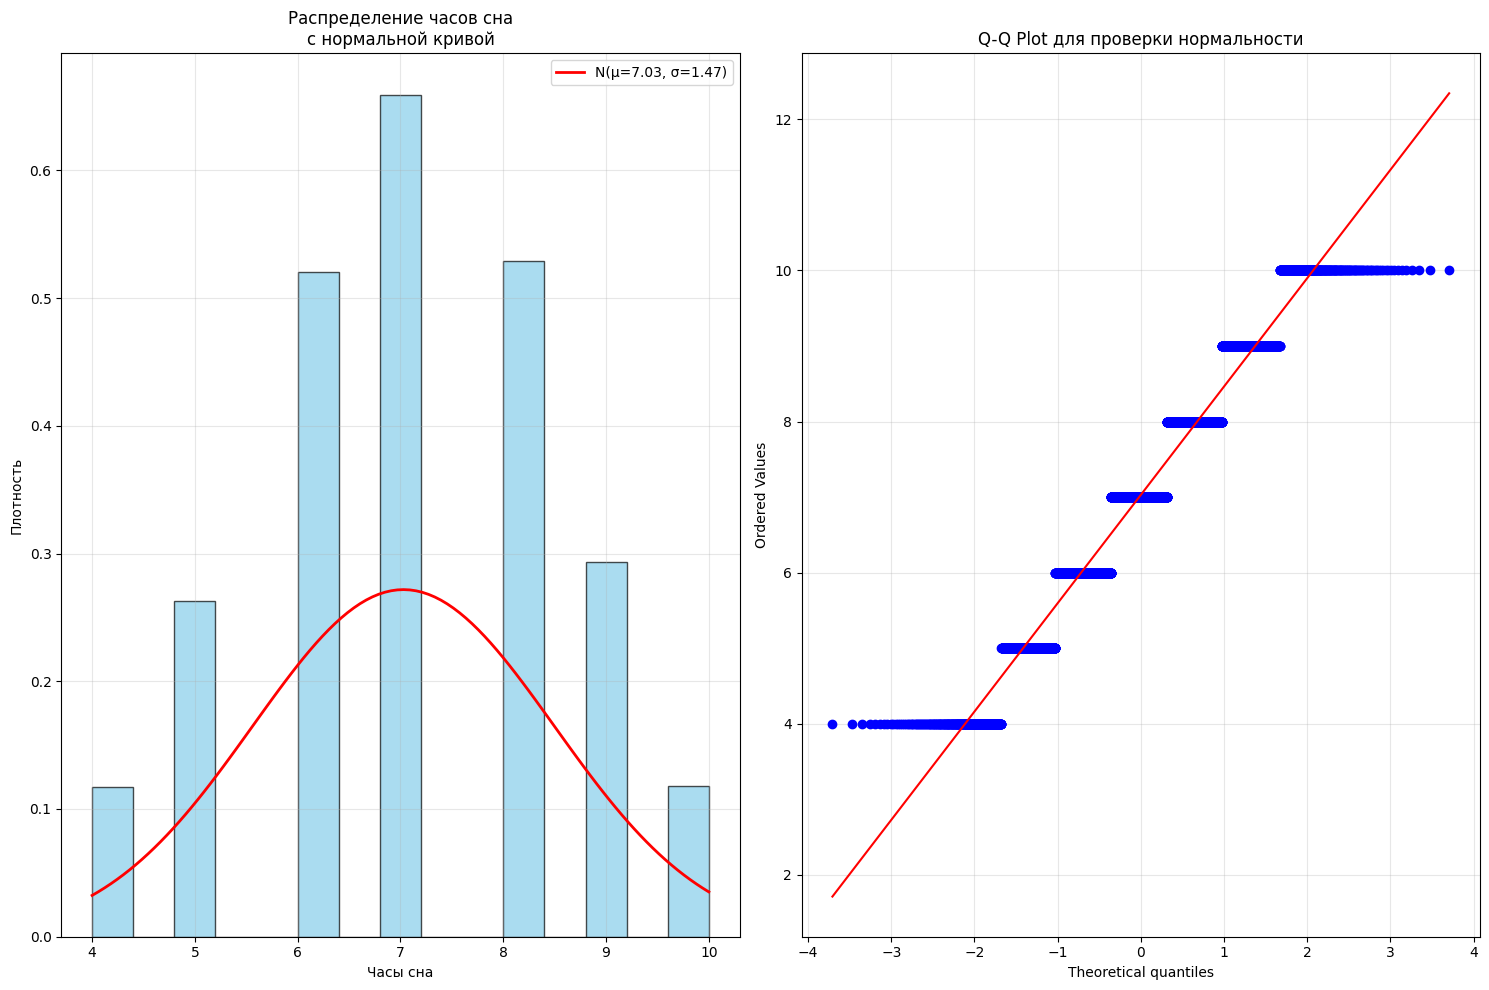

Форма гистограммы близка к нормальной кривой, из графика видно что она совпадает
Большинство точек лежат достаточно близко к красной линии.
В центральной части (между -1 и +1 стандартными отклонениями) точки хорошо следуют линии. Распределение близко к нормальному


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройка стилей
plt.style.use('default')
sns.set_palette("husl")

# Гистограмма с распределением и нормальной кривой
plt.figure(figsize=(15, 10))

mu, sigma = df['Sleep_Hours'].mean(), df['Sleep_Hours'].std()
x = np.linspace(df['Sleep_Hours'].min(), df['Sleep_Hours'].max(), 100)
y = stats.norm.pdf(x, mu, sigma)
plt.subplot(1, 2, 1)
plt.hist(df['Sleep_Hours'], bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.plot(x, y, 'r-', linewidth=2, label=f'N(μ={mu:.2f}, σ={sigma:.2f})')
plt.xlabel('Часы сна')
plt.ylabel('Плотность')
plt.title('Распределение часов сна\nс нормальной кривой')
plt.legend()
plt.grid(True, alpha=0.3)

# Q-Q plot (квантиль-квантиль)
plt.subplot(1, 2, 2)
stats.probplot(df['Sleep_Hours'], dist="norm", plot=plt)
plt.title('Q-Q Plot для проверки нормальности')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Форма гистограммы близка к нормальной кривой, из графика видно что она совпадает")
print("Большинство точек лежат достаточно близко к красной линии.\nВ центральной части (между -1 и +1 стандартными отклонениями) точки хорошо следуют линии. Распределение близко к нормальному")




2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

Из графиков видно , что распредееление часов затрачиваемых на учебу, почти не зависит от пола. Из гистограммы видно, что гендерный фактор не является определяющим в количестве времени, затрачиваемом студентами на обучение.


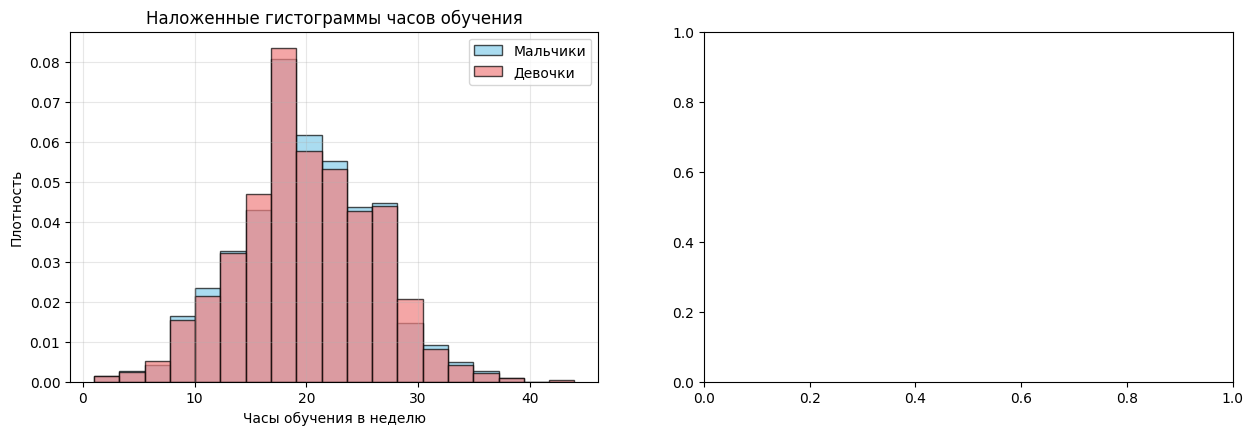

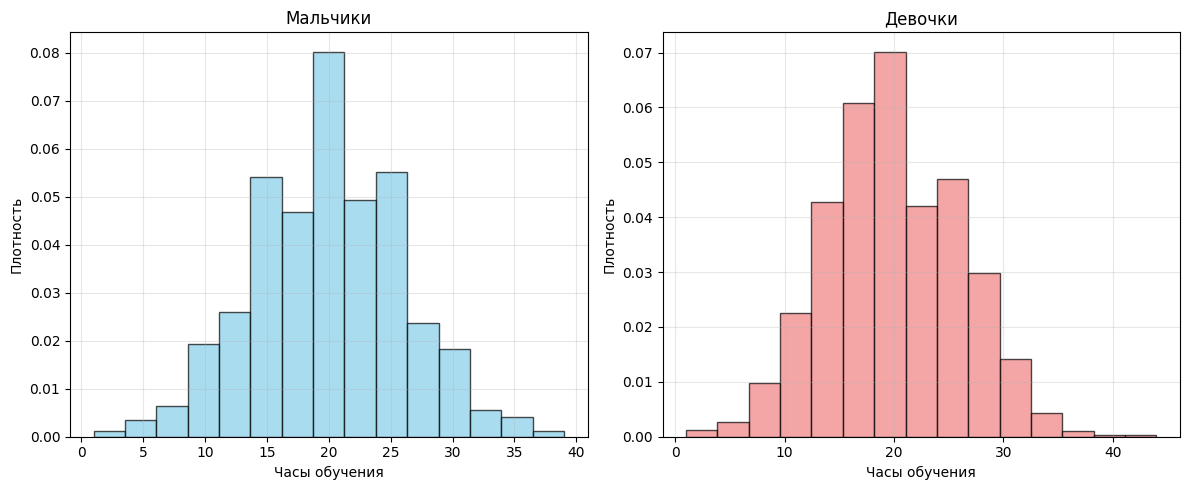

In [27]:
plt.style.use('default')
sns.set_palette("husl")

#Гистограмма с наложением (Overlay Histogram)
plt.figure(figsize=(15, 10))

# Подграфик 1: Наложенные гистограммы
plt.subplot(2, 2, 1)
# Разделяем данные по полу
male_data = df[df['Gender'] == 'Male']['Hours_Studied']
female_data = df[df['Gender'] == 'Female']['Hours_Studied']

# Определяем общие границы для бинов
bins = np.linspace(
    min(df['Hours_Studied'].min(), df['Hours_Studied'].min()),
    max(df['Hours_Studied'].max(), df['Hours_Studied'].max()),
    20
)

plt.hist(male_data, bins=bins, alpha=0.7, color='skyblue',
         label='Мальчики', edgecolor='black', density=True)
plt.hist(female_data, bins=bins, alpha=0.7, color='lightcoral',
         label='Девочки', edgecolor='black', density=True)
plt.xlabel('Часы обучения в неделю')
plt.ylabel('Плотность')
plt.title('Наложенные гистограммы часов обучения')
plt.legend()
plt.grid(True, alpha=0.3)

# Раздельные гистограммы
plt.subplot(2, 2, 2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(male_data, bins=15, alpha=0.7, color='skyblue',
         edgecolor='black', density=True)
ax1.set_xlabel('Часы обучения')
ax1.set_ylabel('Плотность')
ax1.set_title('Мальчики')
ax1.grid(True, alpha=0.3)

ax2.hist(female_data, bins=15, alpha=0.7, color='lightcoral',
         edgecolor='black', density=True)
ax2.set_xlabel('Часы обучения')
ax2.set_ylabel('Плотность')
ax2.set_title('Девочки')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
print("Из графиков видно , что распредееление часов затрачиваемых на учебу, почти не зависит от пола. Из гистограммы видно, что гендерный фактор не является определяющим в количестве времени, затрачиваемом студентами на обучение.")

3. Как зависит результат конечного экзамена от результата первого экзамена

АНАЛИЗ: Зависимость конечного экзамена от первого экзамена


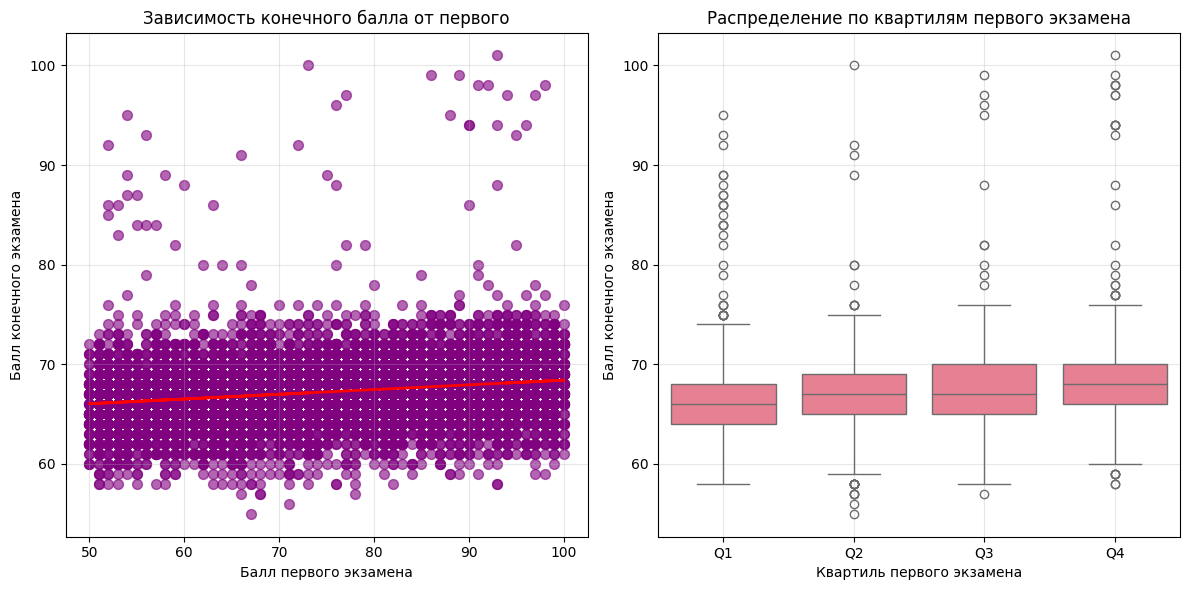


КОРРЕЛЯЦИЯ: 0.175
P-VALUE: 0.0000
Очень слабая зависимость


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Анализ зависимости результата конечного экзамена от первого экзамена
print("АНАЛИЗ: Зависимость конечного экзамена от первого экзамена")

#Scatter plot с линией регрессии
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.6, color='purple', s=50)
plt.xlabel('Балл первого экзамена')
plt.ylabel('Балл конечного экзамена')
plt.title('Зависимость конечного балла от первого')
plt.grid(True, alpha=0.3)

#Линия регрессии
z = np.polyfit(df['Previous_Scores'], df['Exam_Score'], 1)
p = np.poly1d(z)
plt.plot(df['Previous_Scores'], p(df['Previous_Scores']), "r-", linewidth=2)

#Box plot по квартилям первого экзамена
plt.subplot(1, 2, 2)
df['Previous_Quartile'] = pd.qcut(df['Previous_Scores'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
sns.boxplot(data=df, x='Previous_Quartile', y='Exam_Score')
plt.xlabel('Квартиль первого экзамена')
plt.ylabel('Балл конечного экзамена')
plt.title('Распределение по квартилям первого экзамена')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистический анализ
correlation = df['Previous_Scores'].corr(df['Exam_Score'])
p_value = stats.pearsonr(df['Previous_Scores'], df['Exam_Score'])[1]

print(f"\nКОРРЕЛЯЦИЯ: {correlation:.3f}")
print(f"P-VALUE: {p_value:.4f}")

if p_value < 0.05:
    if correlation > 0.7:
        print("Сильная прямая зависимость - первый экзамен хорошо предсказывает конечный")
    elif correlation > 0.5:
        print("Умеренная прямая зависимость")
    elif correlation > 0.3:
        print("Слабая прямая зависимость")
    else:
        print("Очень слабая зависимость")
else:
    print("Нет значимой зависимости между экзаменами")

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

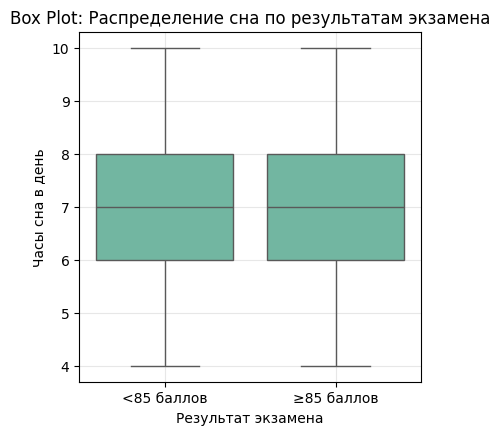

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("Set2")

df['Exam_Category'] = df['Exam_Score'].apply(lambda x: '≥85 баллов' if x >= 85 else '<85 баллов')

#Основной Box Plot
plt.figure(figsize=(15, 10))

#Box Plot
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Exam_Category', y='Sleep_Hours')
plt.xlabel('Результат экзамена')
plt.ylabel('Часы сна в день')
plt.title('Box Plot: Распределение сна по результатам экзамена')
plt.grid(True, alpha=0.3)


def analyze_outliers(group_name, data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_low = (data < lower_bound).sum()
    outliers_high = (data > upper_bound).sum()

    print(f"{group_name}:")
    print(f"  Выбросы (мало сна): {outliers_low} студентов")
    print(f"  Выбросы (много сна): {outliers_high} студентов")
    print(f"  Границы выбросов: {lower_bound:.1f} - {upper_bound:.1f} часов")

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

АНАЛИЗ: Влияние занятий с репетитором на результаты экзамена


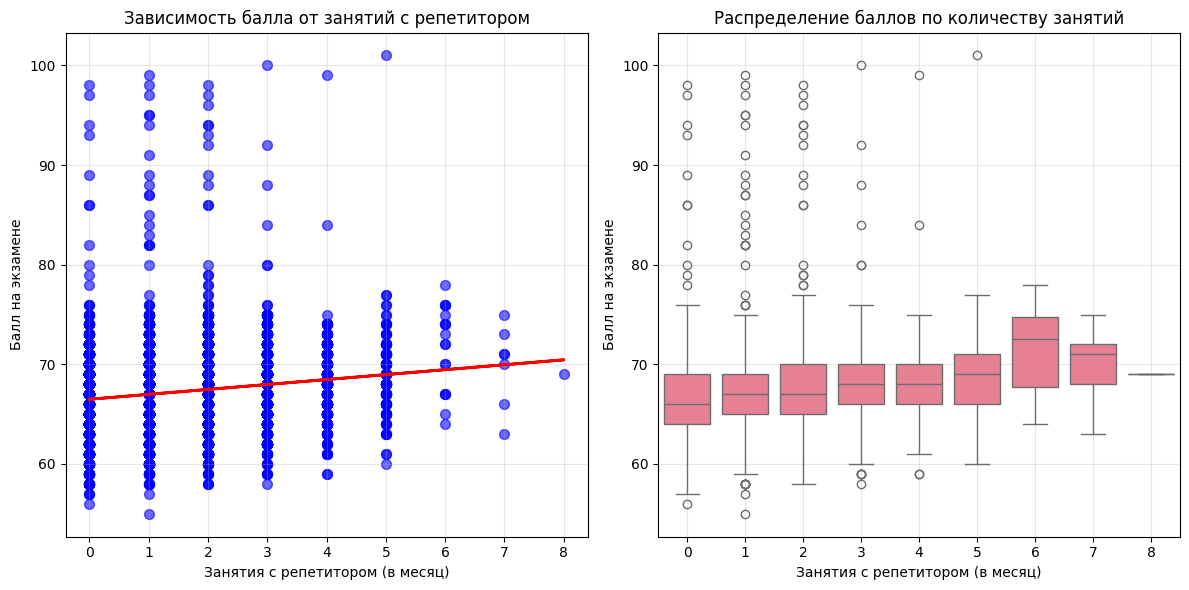


КОРРЕЛЯЦИЯ: 0.157
P-VALUE: 0.0000
Слабая связь, но статистически значимая


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#Scatter plot с линией регрессии
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Tutoring_Sessions'], df['Exam_Score'], alpha=0.6, color='blue', s=50)
plt.xlabel('Занятия с репетитором (в месяц)')
plt.ylabel('Балл на экзамене')
plt.title('Зависимость балла от занятий с репетитором')
plt.grid(True, alpha=0.3)

# Линия регрессии
z = np.polyfit(df['Tutoring_Sessions'], df['Exam_Score'], 1)
p = np.poly1d(z)
plt.plot(df['Tutoring_Sessions'], p(df['Tutoring_Sessions']), "r-", linewidth=2)

#Box plot по группам
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Tutoring_Sessions', y='Exam_Score')
plt.xlabel('Занятия с репетитором (в месяц)')
plt.ylabel('Балл на экзамене')
plt.title('Распределение баллов по количеству занятий')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистический анализ
correlation = df['Tutoring_Sessions'].corr(df['Exam_Score'])
p_value = stats.pearsonr(df['Tutoring_Sessions'], df['Exam_Score'])[1]

print(f"\nКОРРЕЛЯЦИЯ: {correlation:.3f}")
print(f"P-VALUE: {p_value:.4f}")

if p_value < 0.05:
    if correlation > 0.3:
        print("Да, занятия с репетитором значимо улучшают результаты экзамена")
    else:
        print("Слабая связь, но статистически значимая")
else:
    print("Нет значимой связи между занятиями с репетитором и результатами экзамена")

6. Как физическая активность влияет на успеваемость?

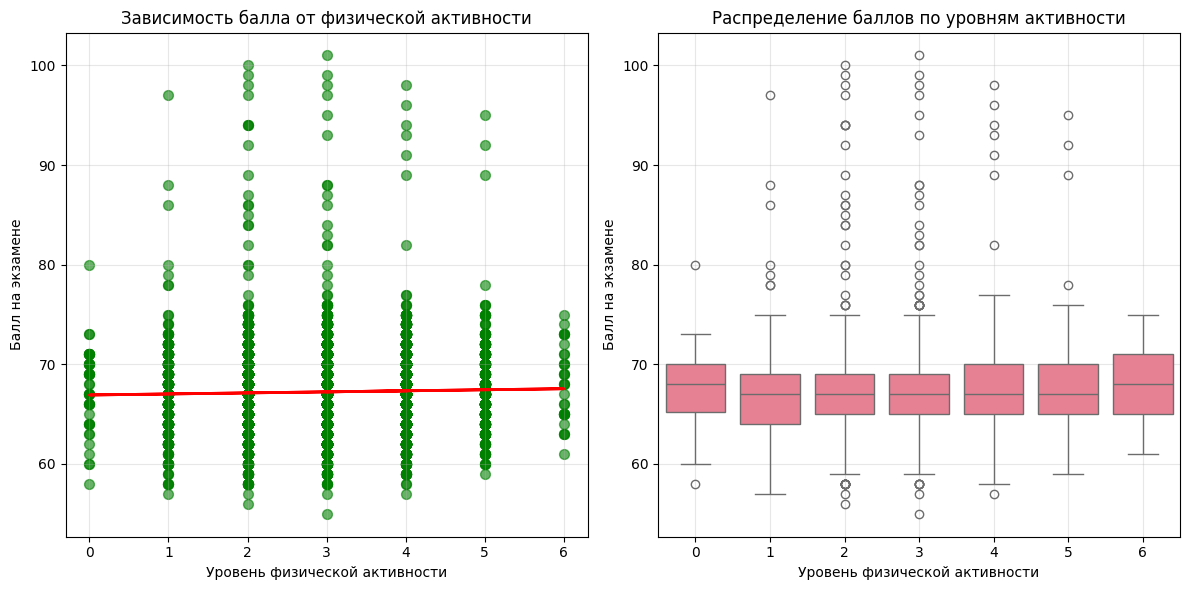


КОРРЕЛЯЦИЯ: 0.028
P-VALUE: 0.0237
Слабая положительная связь, но статистически значимая


In [39]:
#Scatter plot с линией регрессии
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Physical_Activity'], df['Exam_Score'], alpha=0.6, color='green', s=50)
plt.xlabel('Уровень физической активности')
plt.ylabel('Балл на экзамене')
plt.title('Зависимость балла от физической активности')
plt.grid(True, alpha=0.3)

# Линия регрессии
z = np.polyfit(df['Physical_Activity'], df['Exam_Score'], 1)
p = np.poly1d(z)
plt.plot(df['Physical_Activity'], p(df['Physical_Activity']), "r-", linewidth=2)

#Box plot по уровням активности
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Physical_Activity', y='Exam_Score')
plt.xlabel('Уровень физической активности')
plt.ylabel('Балл на экзамене')
plt.title('Распределение баллов по уровням активности')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистический анализ
correlation = df['Physical_Activity'].corr(df['Exam_Score'])
p_value = stats.pearsonr(df['Physical_Activity'], df['Exam_Score'])[1]

print(f"\nКОРРЕЛЯЦИЯ: {correlation:.3f}")
print(f"P-VALUE: {p_value:.4f}")

if p_value < 0.05:
    if correlation > 0.3:
        print("Да, физическая активность значимо улучшает успеваемость")
    elif correlation > 0:
        print("Слабая положительная связь, но статистически значимая")
    else:
        print("Физическая активность отрицательно влияет на успеваемость")
else:
    print("Нет значимой связи между физической активностью и успеваемостью")

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл